In [122]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinical_data_combined = pd.merge(clinical_trial_data, mouse_drug_data, how = 'left', on=['Mouse ID', 'Mouse ID'])
clinical_data_combined.head()

# Display the data table for preview
clinical_data_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [75]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_by_drug = clinical_data_combined.groupby(['Drug', 'Timepoint'])
mean_Tumor = grouped_by_drug['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_Tumor_df = pd.DataFrame(mean_Tumor)
mean_Tumor_df = mean_Tumor_df.reset_index()
mean_Tumor_df = mean_Tumor_df.rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume (mm3)"})

# Preview DataFrame
mean_Tumor_df.head()

,Drug,Timepoint,Mean Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [74]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
from scipy.stats import sem
StdErr_Tumor = grouped_by_drug['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
StdErr_Tumor_df = pd.DataFrame(StdErr_Tumor)
StdErr_Tumor_df = StdErr_Tumor_df.reset_index()
StdErr_Tumor_df = StdErr_Tumor_df.rename(columns={"Tumor Volume (mm3)":"STE Tumor Volume (mm3)"})

# Preview DataFrame
StdErr_Tumor_df.head()

,Drug,Timepoint,STE Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [125]:
# Minor Data Munging to Re-Format the Data Frames
table_Tumor = mean_Tumor_df.pivot(index='Timepoint', columns='Drug', values='Mean Tumor Volume (mm3)')
STE_table_Tumor = StdErr_Tumor_df.pivot(index='Timepoint', columns='Drug', values='STE Tumor Volume (mm3)')
# Preview that Reformatting worked
table_Tumor

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


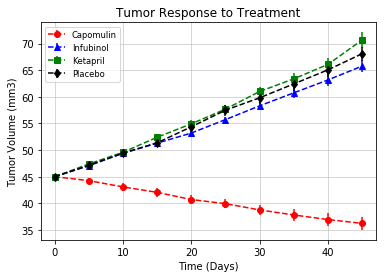

In [183]:
fig, ax = plt.subplots()

ax.errorbar(table_Tumor.index, table['Capomulin'], yerr=STE_table_Tumor['Capomulin'], fmt="--o", color="r",
            alpha=1, label="Capomulin")
ax.errorbar(table_Tumor.index, table['Infubinol'], yerr=STE_table_Tumor['Infubinol'], fmt="--^", color="b",
            alpha=1, label="Infubinol")
ax.errorbar(table_Tumor.index, table['Ketapril'], yerr=STE_table_Tumor['Ketapril'], fmt="--s", color="g",
            alpha=1, label="Ketapril")
ax.errorbar(table_Tumor.index, table['Placebo'], yerr=STE_table_Tumor['Placebo'], fmt="--d", color="k",
            alpha=1, label="Placebo")

ax.set_xlim((min(table_Tumor.index)-2), (max(table_Tumor.index)+2))

ax.set_title("Tumor Response to Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.grid(linestyle='-', linewidth='0.5')

plt.legend(loc="best", fontsize="small", fancybox=True)

# Save fig
plt.savefig('Plots/Tumor_response')

plt.show()


In [130]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_Meta = grouped_by_drug['Metastatic Sites'].mean()

# Convert to DataFrame
mean_Meta_df = pd.DataFrame(mean_Meta)
mean_Meta_df = mean_Meta_df.reset_index()
mean_Meta_df = mean_Meta_df.rename(columns={"Metastatic Sites":"Mean Metastatic Sites"})

# Preview DataFrame
mean_Meta_df.head()


,Drug,Timepoint,Mean Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [129]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
StdErr_Meta = grouped_by_drug['Metastatic Sites'].sem()

# Convert to DataFrame
StdErr_Meta_df = pd.DataFrame(StdErr_Meta)
StdErr_Meta_df = StdErr_Meta_df.reset_index()
StdErr_Meta_df = StdErr_Meta_df.rename(columns={"Metastatic Sites":"STE Metastatic Sites"})

# Preview DataFrame
StdErr_Meta_df.head()

,Drug,Timepoint,STE Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [131]:
# Minor Data Munging to Re-Format the Data Frames
table_Meta = mean_Meta_df.pivot(index='Timepoint', columns='Drug', values='Mean Metastatic Sites')
STE_table_Meta = StdErr_Meta_df.pivot(index='Timepoint', columns='Drug', values='STE Metastatic Sites')
# Preview that Reformatting worked
table_Meta

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


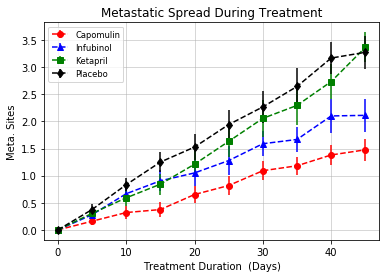

In [189]:
# Generate the Plot (with Error Bars)
fig2, ax = plt.subplots()

ax.errorbar(table_Meta.index, table_Meta['Capomulin'], yerr=STE_table_Meta['Capomulin'], fmt="--o", color="r",
            alpha=1, label="Capomulin")
ax.errorbar(table_Meta.index, table_Meta['Infubinol'], yerr=STE_table_Meta['Infubinol'], fmt="--^", color="b",
            alpha=1, label="Infubinol")
ax.errorbar(table_Meta.index, table_Meta['Ketapril'], yerr=STE_table_Meta['Ketapril'], fmt="--s", color="g",
            alpha=1, label="Ketapril")
ax.errorbar(table_Meta.index, table_Meta['Placebo'], yerr=STE_table_Meta['Placebo'], fmt="--d", color="k",
            alpha=1, label="Placebo")

ax.set_xlim((min(table_Meta.index)-2), (max(table_Meta.index)+2))

ax.set_title("Metastatic Spread During Treatment")
ax.set_xlabel("Treatment Duration  (Days)")
ax.set_ylabel("Meta. Sites")
ax.grid(linestyle='-', linewidth='0.5')

plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig('Plots/Meta_response')

# Show the Figure
plt.show()

In [136]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = grouped_by_drug['Mouse ID'].count()

# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_count)
mouse_count_df = mouse_count_df.reset_index()
mouse_count_df = mouse_count_df.rename(columns={"Mouse ID":"Mouse Count"})

# Preview DataFrame
mouse_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [154]:
# Minor Data Munging to Re-Format the Data Frames
table_mouse_count = mouse_count_df.pivot(index='Timepoint', columns='Drug', values='Mouse Count')

# Preview the Data Frame

x = table_mouse_count['Capomulin']/((table_mouse_count['Capomulin'][0])/100)
x


Timepoint
0     100.0
5     100.0
10    100.0
15     96.0
20     92.0
25     88.0
30     88.0
35     88.0
40     84.0
45     84.0
Name: Capomulin, dtype: float64

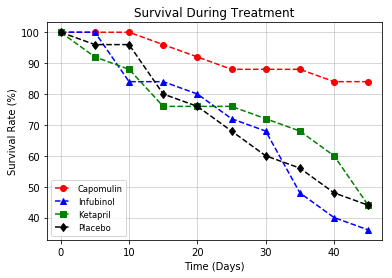

In [188]:
# Generate the Plot (with Error Bars)
fig3, ax = plt.subplots()

ax.errorbar(table_mouse_count.index, table_mouse_count['Capomulin']/((table_mouse_count['Capomulin'][0])/100), 
            fmt="--o", color="r", alpha=1, label="Capomulin")
ax.errorbar(table_mouse_count.index, table_mouse_count['Infubinol']/((table_mouse_count['Infubinol'][0])/100),
            fmt="--^", color="b",alpha=1, label="Infubinol")
ax.errorbar(table_mouse_count.index, table_mouse_count['Ketapril']/((table_mouse_count['Ketapril'][0])/100),
            fmt="--s", color="g",alpha=1, label="Ketapril")
ax.errorbar(table_mouse_count.index, table_mouse_count['Placebo']/((table_mouse_count['Placebo'][0])/100),
            fmt="--d", color="k",alpha=1, label="Placebo")

ax.set_xlim((min(table_mouse_count.index)-2), (max(table_mouse_count.index)+2))

ax.set_title("Survival During Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
ax.grid(linestyle='-', linewidth='0.5')

plt.legend(loc="best", fontsize="small", fancybox=True)

# Save Fig
plt.savefig('Plots/Survival')

# Show the Figure
plt.show()

In [201]:
# Calculate the percent changes for each drug
prct_change = [((table_Tumor[x][45] - table_Tumor[x][0])*100)/table_Tumor[x][0] for x in table_Tumor.columns]
prct_change_df = pd.DataFrame({"Drug":table_Tumor.columns, "% Change in Tumor": prct_change})
prct_change_df = pd.DataFrame({"Drug":table_Tumor.columns, "% Change in Tumor": prct_change})

# Display the data to confirm
prct_change_df

,Drug,% Change in Tumor
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


In [196]:

objects = (prct_change_df['% Change in Tumor'][x],prct_change_df['% Change in Tumor'][2])
objects


('Ceftamin', 'Infubinol')

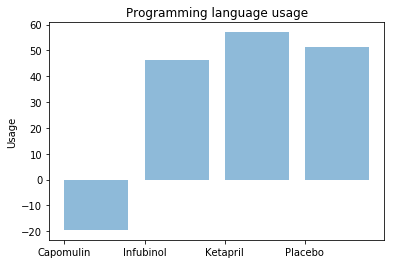

In [212]:
# Store all Relevant Percent Changes into a Tuple
objects = ('Capomulin','Infubinol', 'Ketapril', 'Placebo')
y_pos = np.arange(len(objects))
performance = (prct_change_df['% Change in Tumor'][0],prct_change_df['% Change in Tumor'][2],prct_change_df['% Change in Tumor'][3],
              prct_change_df['% Change in Tumor'][5])

plt.bar(y_pos, performance, align='edge', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 
bar_width = 0.35

# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()
